In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

(b) (5 points) Instead of using an equal-weight majority vote, we can use
a weighted majority vote in which the strong classifier has a larger
weight. Implement a function that computes, for a given weight w
for the strong classifier, the probability that the weighted majority
vote results in the correct decision. Make a graph of the probability
of a correct decision given different weights. What is the optimal
weight for the strong classifier?

In [3]:
def success_prob(M:float, p:float, n_successes:int) -> float:
    """
    Calculate the probability of having at least <n_successes> successful trials in a series of <M> independent Bernoulli trials 
    with a success rate of <p>.
    """
    return 1 - np.sum([math.comb(M, i) * p**i * (1-p)**(M-i) for i in range(0, n_successes)])

In [4]:
def prob_bounded(M:float, p:float, successes:int) -> float:
    """
    Calculate the probability of up to <successes> successful trials in <M> independent trials with success_rate <p>.
    """
    return np.sum([math.comb(M, i) * p**i * (1-p)**(M-i) for i in range(0, successes)])

In [16]:
def weighted_majority(weight:int, p_strong:float, p_weak:float) -> float:
    """
    Calculates the probability of a correct majority decision given
    - A strong classifier with success rate <p_strong>
    - An ensemble of 10 weak classifiers with respective success rates <p_weak>
    - A weight factor <weight> for the vote of the strong classifier
    """
    print(f'weight: {weight}')
    # there are 10 weak classifiers 
    n_weak = 10
    # the theoretical number of votes is the sum of weak classifiers and the weight of the strong classifier
    theoretical_vote_cap = n_weak + weight
    # the majority is based on the theoretical vote cap
    n_majority = math.floor(theoretical_vote_cap / 2) + 1
    print("Majority:", n_majority)
    
    # The first way to gain a majority is to have enough weak classifiers voting correctly
    if n_majority <= 10:
        weak_majority = success_prob(n_weak, p_weak, n_majority)
        print("Probability of weak majority:", weak_majority)
    else:
        weak_majority = 0
    
    # The second way to gain a majority is for the strong classifier to vote correctly and have enough support from the weak classifiers
    # For that we need to calculate the probability of the lower bound and subtract it from the probability of the upper bound of supporting classifiers
    lower_bound = n_majority - weight
    if lower_bound > 0:
        upper_bound = n_majority
        p_lower = prob_bounded(n_weak, p_weak, lower_bound)
        p_upper = prob_bounded(n_weak, p_weak, upper_bound)
        strong_majority = (p_upper - p_lower) * p_strong
        print("Probability of strong majority:", strong_majority)
    else:
        strong_majority = p_strong
    print(f'probability of reaching a majority: {weak_majority + strong_majority}')
    return weak_majority + strong_majority

In [6]:
print("Weight: 1, Probability:", weighted_majority(1, 0.8, 0.6))

Majority: 6
Probability of weak majority: 0.6331032576
Probability of strong majority: 0.16052649984000003
Weight: 1, Probability: 0.79362975744


In [17]:
# Get the probabilities of a correct majority decision for varying weights in a range of [1,11]
probabilities = [weighted_majority(weight, 0.8, 0.6) for weight in range(1, 12)]

weight: 1
Majority: 6
Probability of weak majority: 0.6331032576
Probability of strong majority: 0.16052649984000003
probability of reaching a majority: 0.79362975744
weight: 2
Majority: 7
Probability of weak majority: 0.3822806015999999
Probability of strong majority: 0.3611846246400001
probability of reaching a majority: 0.74346522624
weight: 3
Majority: 7
Probability of weak majority: 0.3822806015999999
Probability of strong majority: 0.45036601344000005
probability of reaching a majority: 0.8326466150399999
weight: 4
Majority: 8
Probability of weak majority: 0.16728975359999987
Probability of strong majority: 0.6223586918400001
probability of reaching a majority: 0.78964844544
weight: 5
Majority: 8
Probability of weak majority: 0.16728975359999987
Probability of strong majority: 0.6563325542400001
probability of reaching a majority: 0.82362230784
weight: 6
Majority: 9
Probability of weak majority: 0.0463574015999999
Probability of strong majority: 0.7530784358400001
probability of 

Text(0, 0.5, 'probability of correct majority decision')

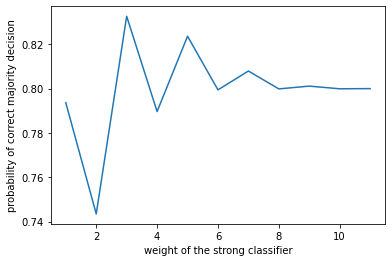

In [12]:
plt.plot([i for i in range(1,12)], probabilities)
plt.xlabel('weight of the strong classifier')
plt.ylabel('probability of correct majority decision')

(c) (5 points) The AdaBoost.M1 algorithm provides a formula to compute the classifier weights based on their error on the training set.
Use the expected errors of the strong and weak classifiers to compute their respective weights. Compare the answer to the answer
you found in the previous question.

In [13]:
print(math.log((1-0.2)/0.2))
print(math.log((1-0.4)/0.4))

1.3862943611198906
0.4054651081081642


(d) (5 points) Plot the weight given to a base-learner in the AdaBoost
algorithm for different values of the error the base-learner makes.
Explain what you see. What does it mean for these weights if we
assume the base-learners are weak-learners? What happens to the
weights if the probability of error of the base-learner is > 0.5 and
why?


In [2]:
def get_weight(error_rate):
  return np.log((1-error_rate)/error_rate)
  

In [3]:
weights = []
for i in range(1, 100):
  err_rate = i/100
  weight = get_weight(err_rate)
  weights.append(weight)
  

Text(0.5, 1.0, 'Comparing weights for base learners with varying error rates')

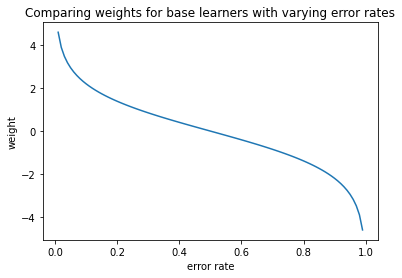

In [6]:
plt.plot([i/100 for i in range(1,100)], weights)
plt.xlabel('error rate')
plt.ylabel('weight')
plt.title('Comparing weights for base learners with varying error rates')